In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sn

In [4]:
df = pd.read_csv('../data/Bank Customer Churn Prediction.csv')

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


customer_id


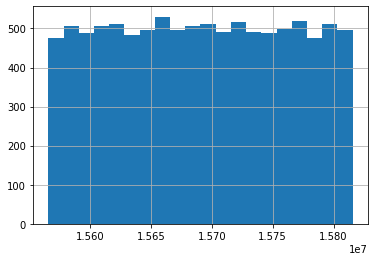

credit_score


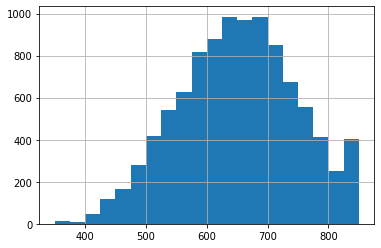

country


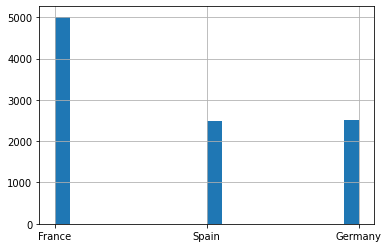

gender


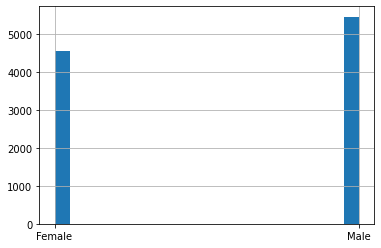

age


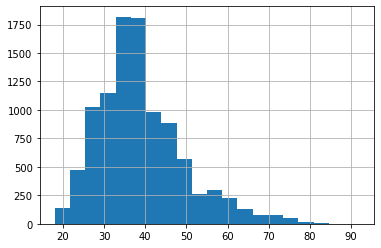

tenure


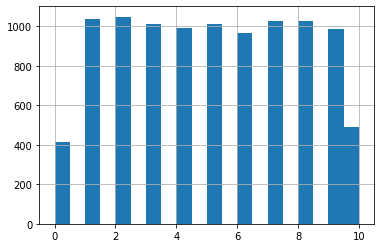

balance


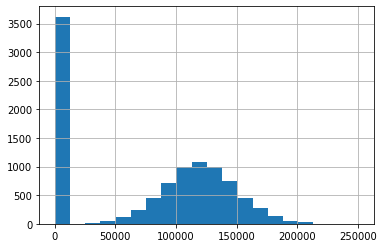

products_number


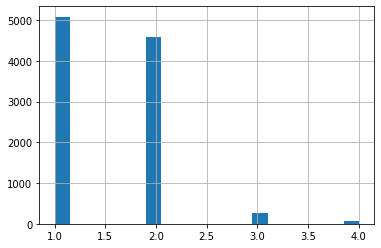

credit_card


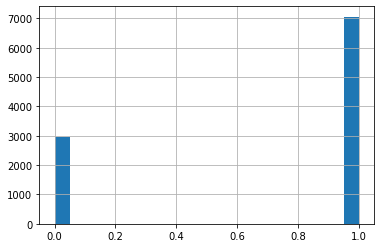

active_member


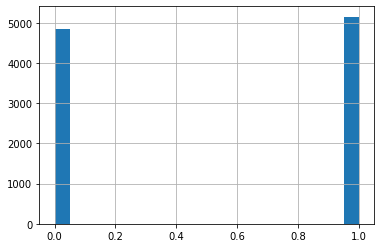

estimated_salary


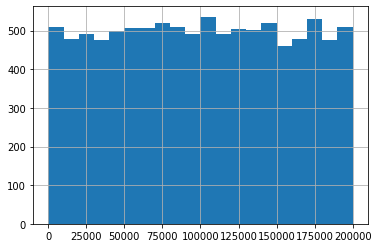

churn


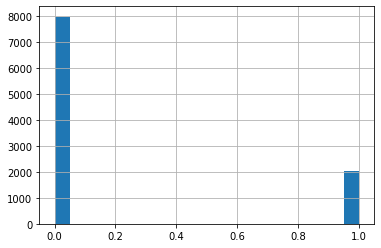

In [6]:
for c in df.columns:
    print(c)
    df[c].hist(bins=20)
    plt.show()

In [7]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [8]:
1-(2037/7963)

0.7441918874795932

In [13]:
df_with_dummies= pd.get_dummies(df,columns=["country", "gender"],drop_first=False)

In [14]:
df_with_dummies

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [47]:
X = df_with_dummies.drop(columns=['customer_id', 'churn', 'age'])
y = df_with_dummies['churn']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [97]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.25, random_state=42)

In [98]:
forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

In [99]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [100]:
forest.score(X_train, y_train)

0.8255

In [101]:
forest.score(X_test, y_test)

0.8215

In [102]:
forest.score(X_val, y_val)

0.8083333333333333

In [93]:
forest.feature_importances_

array([0.04346242, 0.01928488, 0.11091508, 0.40690001, 0.00364695,
       0.13301038, 0.02385664, 0.03391471, 0.14086236, 0.00334632,
       0.04373813, 0.03706211])

In [94]:
forest.feature_names_in_

array(['credit_score', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary',
       'country_France', 'country_Germany', 'country_Spain',
       'gender_Female', 'gender_Male'], dtype=object)

In [88]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [45]:
predictions = forest.predict(X_test)

<AxesSubplot:>

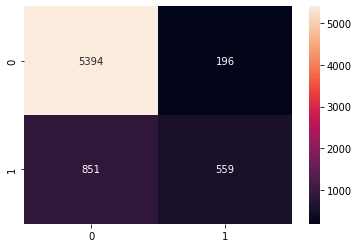

In [46]:
cm = confusion_matrix(y_test, predictions)
sn.heatmap(cm, annot=True, fmt='g')